In [6]:
#Setup
import pandas as pd
pd.set_option('display.max_rows', None)

fire = pd.read_csv("data/fire_data.csv", sep=",")
population = pd.read_csv("data/population.csv", sep=",")

### Submetric 2: Fire Safety
If there's one thing I don't want to do its light on fire. We will look at recent fire statistics to measure where the most amount of fire related emergency responses are made.

In [8]:
fire['alarm_time'] = pd.to_datetime(fire['alarm_time'])
lowest_date = fire['alarm_time'].min()
highest_date = fire['alarm_time'].max()
print(f"Our start date is {lowest_date}")
print(f"Our end date is {highest_date}")

Our start date is 2013-01-02 23:34:05
Our end date is 2024-11-01 21:03:43


In [9]:
# Total number of smart containers
total_count = fire.shape[0]
print(f"There were {total_count} fire calls")

There were 10208 fire calls


In [10]:
neighborhood_counts = fire.groupby('neighborhood').size().reset_index(name='count')
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count
15,Carrick,307
16,Central Business District,289
72,South Side Flats,288
77,Squirrel Hill South,267
38,Hazelwood,257
53,Mount Washington,231
28,East Liberty,220
13,Brookline,203
41,Homewood South,202
46,Lincoln-Lemington-Belmar,199


In [11]:
neighborhood_counts.sort_values(by='count').head(10)

,neighborhood,count
52,Mount Oliver Borough,6
66,Regent Square,9
26,East Carnegie,11
67,Ridgemont,12
54,Mt. Oliver,12
59,Oakwood,13
4,Arlington Heights,13
78,St. Clair,14
82,Swisshelm Park,17
20,Chartiers City,18


In [12]:
neighborhood_counts['percentage'] = round((neighborhood_counts['count'] / total_count), 4) * 100
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count,percentage
15,Carrick,307,3.01
16,Central Business District,289,2.83
72,South Side Flats,288,2.82
77,Squirrel Hill South,267,2.62
38,Hazelwood,257,2.52
53,Mount Washington,231,2.26
28,East Liberty,220,2.16
13,Brookline,203,1.99
41,Homewood South,202,1.98
46,Lincoln-Lemington-Belmar,199,1.95


In [13]:
neighborhood_counts.sort_values(by='count').head(10)

,neighborhood,count,percentage
52,Mount Oliver Borough,6,0.06
66,Regent Square,9,0.09
26,East Carnegie,11,0.11
67,Ridgemont,12,0.12
54,Mt. Oliver,12,0.12
59,Oakwood,13,0.13
4,Arlington Heights,13,0.13
78,St. Clair,14,0.14
82,Swisshelm Park,17,0.17
20,Chartiers City,18,0.18


In [26]:
merged = pd.merge(neighborhood_counts, population, left_on='neighborhood', right_on='Neighborhood', how='inner')

merged['fires per person'] = round(merged['count']/merged['2020_Total_Population'], 6)
merged.sort_values(by='fires per person')
merged[['neighborhood','count','2020_Total_Population','fires per person']].sort_values(by='fires per person').head(10)

,neighborhood,count,2020_Total_Population,fires per person
84,Westwood,28,3332,0.008403
62,Regent Square,9,971,0.009269
48,Morningside,35,3252,0.010763
71,Squirrel Hill North,136,11879,0.011449
52,North Oakland,133,10691,0.012440
64,Shadyside,193,15317,0.012600
36,Highland Park,79,6235,0.012670
55,Oakwood,13,1025,0.012683
77,Swisshelm Park,17,1339,0.012696
59,Point Breeze,72,5348,0.013463


We can see that Carrick has 307 fires within the past 10 years, which is 3% of all fire reports. We also see that within the top 10, neighborhoods 2-3 percent of the fire reports. We can also see that the 10 lowest reported neighborhoods had less than .2% of reports. We can see that some neighborhoods have fewer fires per person, so options that are below .02 fires per person would be considered low.

We will now visualize the data. Using a bar graph, we can see that Carrick and Downtown have the most amount of fire reports, and the amount per neighborhood decreases at a fairly exponential rate.

Text(0.5, 1.0, 'Count of fire reports')

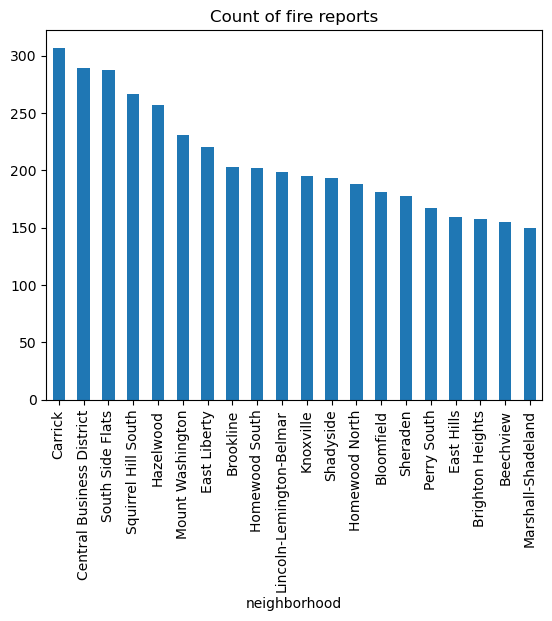

In [37]:
import matplotlib.pyplot as plt
plotted = neighborhood_counts.sort_values(by='count', ascending=False).head(20)

plotted.plot(kind='bar', x='neighborhood', y='count', legend=False)
plt.title("Count of fire reports")

### Submetric 2 Conclusion

We can conclude that neighborhoods like North Oakland, Squirrel Hill North, and Shadyside are some of the most fire safe since they have the lowest amount of fires per person.